In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import matplotlib as mt

In [2]:
train_datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.25,
                          height_shift_range=0.25,
                          shear_range=0.2,
                          zoom_range=0.2,
                          rescale=1./255,
                          horizontal_flip=True,
                          fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
#Train data fetching from the directory of images

batch_size=16
train_data=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Bike and Car/Train',
                                            target_size=(150,150),batch_size=batch_size,
                                            class_mode='binary')

Found 308 images belonging to 2 classes.


In [13]:
# test data fetching from the directory of images

test_data=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Bike and Car/Test',
                                            target_size=(150,150),batch_size=batch_size,
                                            class_mode='binary')

Found 180 images belonging to 2 classes.


In [14]:
model=Sequential()

#1st convolution layer

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#2ns convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

#convering multi dimension to 1d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1,activation='sigmoid'))

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 32)       

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,
                validation_data=test_data,
                validation_steps=48//batch_size,
                epochs=30)

Epoch 1/30
3/3 [==============================] - 10s 2s/step - loss: 1.4931 - accuracy: 0.6250 - val_loss: 0.9654 - val_accuracy: 0.2292
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 0.9661 - accuracy: 0.5000 - val_loss: 0.6876 - val_accuracy: 0.5833
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 0.6650 - accuracy: 0.6667 - val_loss: 0.6293 - val_accuracy: 0.6875
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.7173 - accuracy: 0.5208 - val_loss: 0.7239 - val_accuracy: 0.2917
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 0.7004 - accuracy: 0.5208 - val_loss: 0.7464 - val_accuracy: 0.3125
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 0.7355 - accuracy: 0.5000 - val_loss: 0.7236 - val_accuracy: 0.3125
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 0.6959 - accuracy: 0.5417 - val_loss: 0.6288 - val_accuracy: 0.7083
Epoch 8/30
3/3 [========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


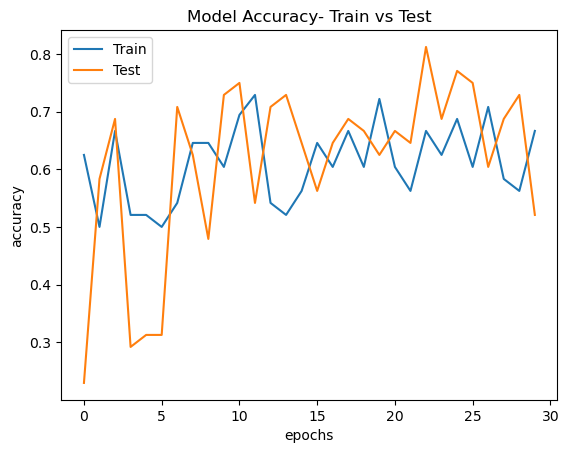

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


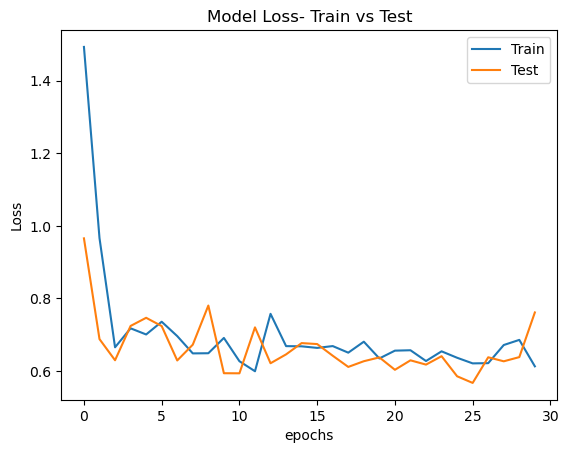

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()